Install required libraries and clone the repository

In [ ]:
!pip install -q ultralytics
!pip install -q opencv-python
!pip install -q numpy
!pip install -q scipy

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 46.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 413MB/s]


In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
from ultralytics.utils import torch_utils

# Load the YOLOv8 model
model = YOLO("yolov8m.pt")

 Define the tracking function using DeepSORT

In [4]:
pip install deep-sort-realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.3 MB/s eta 0:00:00


In [5]:
import torch
from deep_sort_realtime.deepsort_tracker import DeepSort

def track_objects(outputs, img, img0):
    # Initialize the DeepSORT tracker
    tracker = DeepSort(model_path="deep_sort/deep_sort/deep/checkpoint/ckpt.t7")

    # Convert the YOLO outputs to DeepSORT format
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and class_id in [0, 1]:  # Filter by class (child or therapist)
                x, y, w, h = detection[0:4] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
                tracker.update((x, y, w, h), class_id, confidence)

    # Draw the tracked bounding boxes
    for track in tracker.tracks:
        if not track.is_confirmed() or track.time_since_update > 1:
            continue
        x, y, w, h = track.to_tlbr()
        cv2.rectangle(img0, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
        cv2.putText(img0, f"ID: {track.track_id}", (int(x), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

Load the test videos and run the inference pipeline


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 110.9ms
Speed: 5.2ms preprocess, 110.9ms inference, 726.1ms postprocess per image at shape (1, 3, 480, 640)


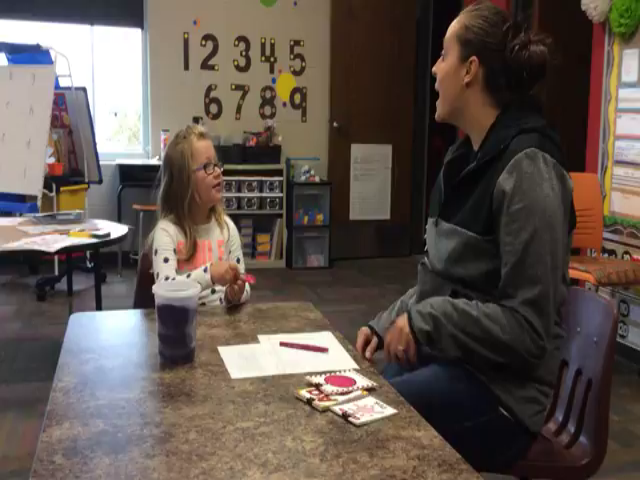


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 28.2ms
Speed: 1.9ms preprocess, 28.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


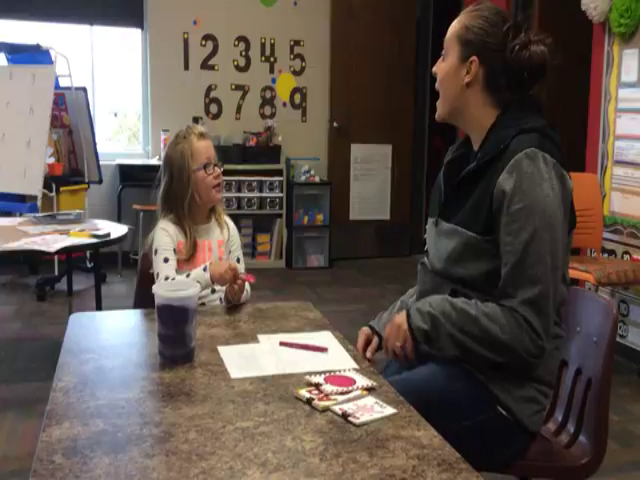


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 28.1ms
Speed: 1.2ms preprocess, 28.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


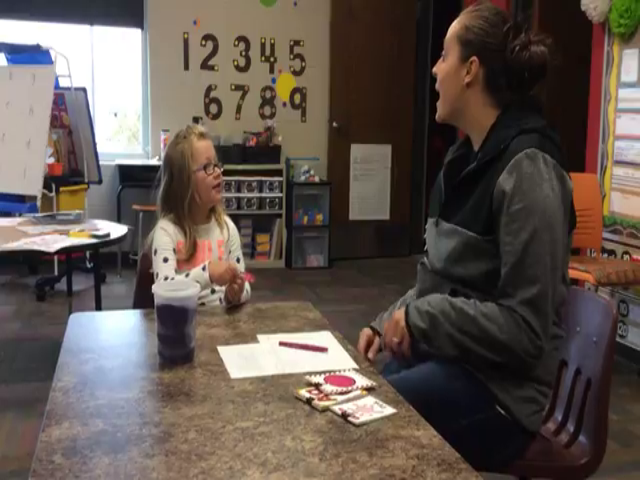


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 28.1ms
Speed: 1.4ms preprocess, 28.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


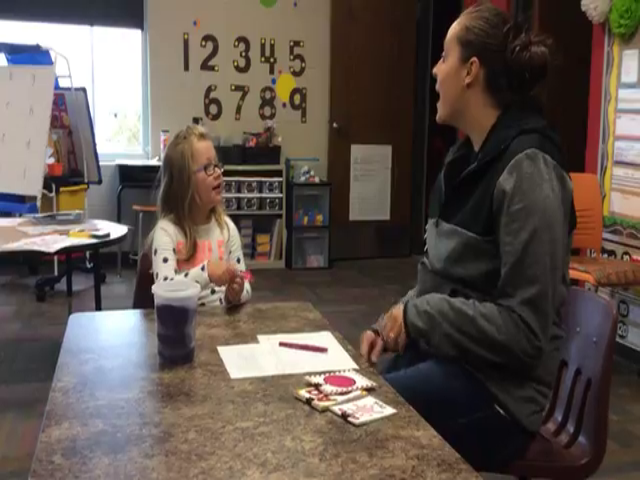


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 28.1ms
Speed: 1.2ms preprocess, 28.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


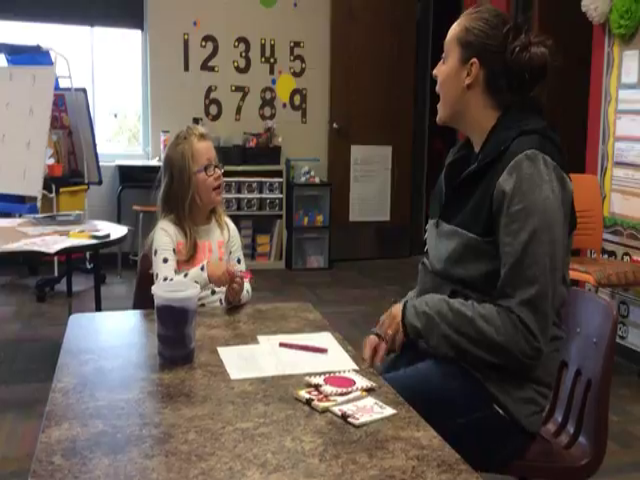


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 1 book, 28.2ms
Speed: 1.6ms preprocess, 28.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


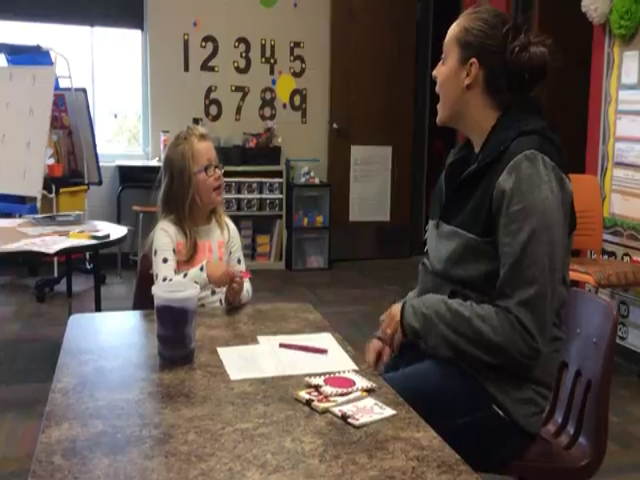


0: 480x640 2 persons, 1 cup, 1 chair, 2 dining tables, 1 book, 28.2ms
Speed: 1.8ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


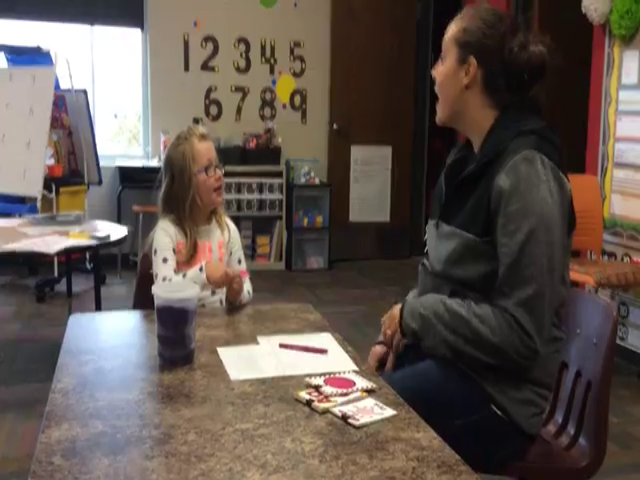


0: 480x640 2 persons, 1 cup, 1 chair, 2 dining tables, 28.2ms
Speed: 1.9ms preprocess, 28.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


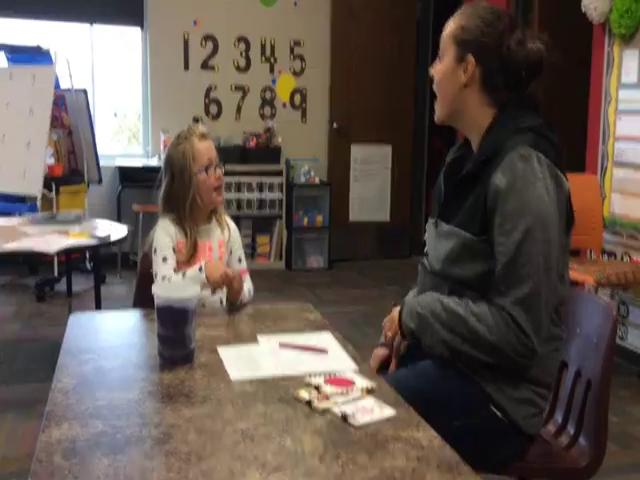


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 3 books, 28.1ms
Speed: 1.6ms preprocess, 28.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


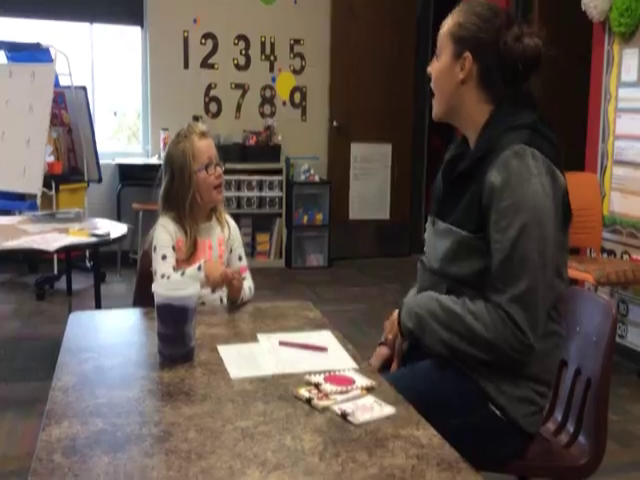


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 2 books, 28.1ms
Speed: 1.7ms preprocess, 28.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


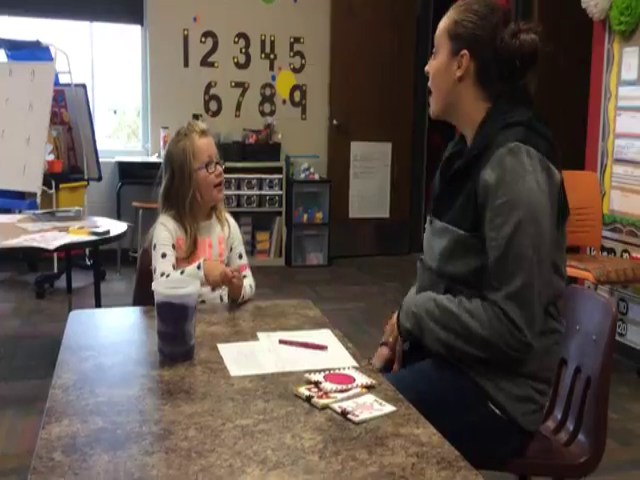


0: 480x640 2 persons, 1 bench, 1 cup, 3 chairs, 2 dining tables, 1 book, 28.1ms
Speed: 1.8ms preprocess, 28.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


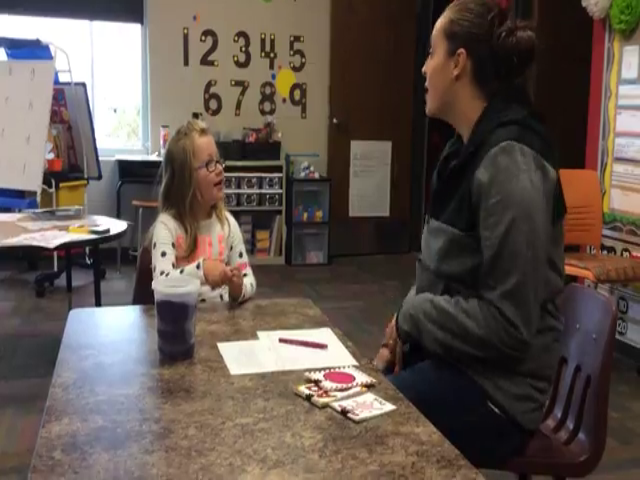


0: 480x640 2 persons, 1 cup, 2 chairs, 2 dining tables, 3 books, 28.1ms
Speed: 1.6ms preprocess, 28.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


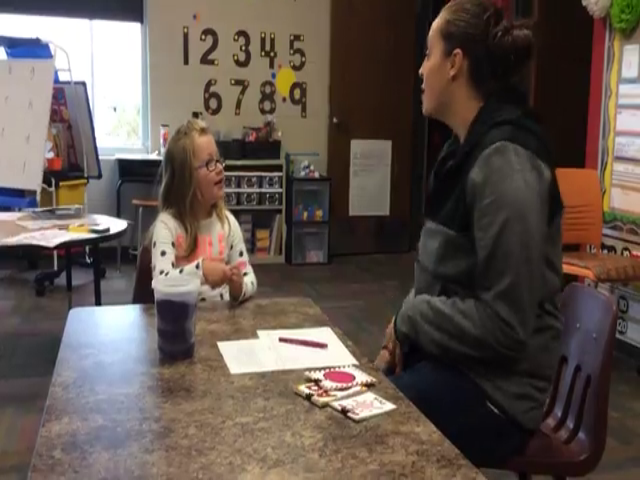


0: 480x640 2 persons, 1 cup, 3 chairs, 2 dining tables, 3 books, 28.2ms
Speed: 1.6ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


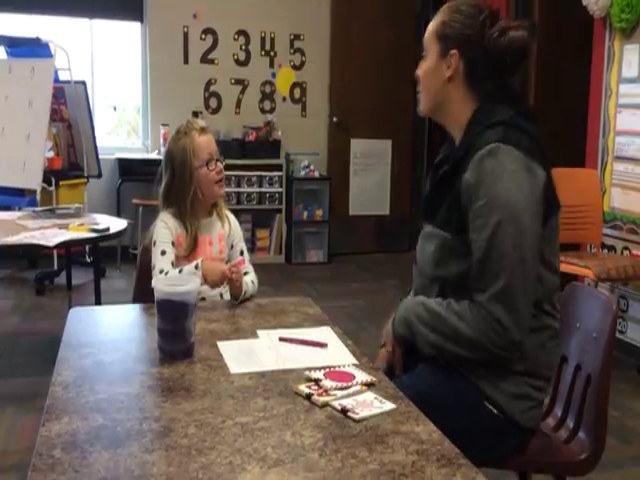


0: 480x640 2 persons, 1 bench, 1 cup, 3 chairs, 2 dining tables, 3 books, 28.2ms
Speed: 1.7ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


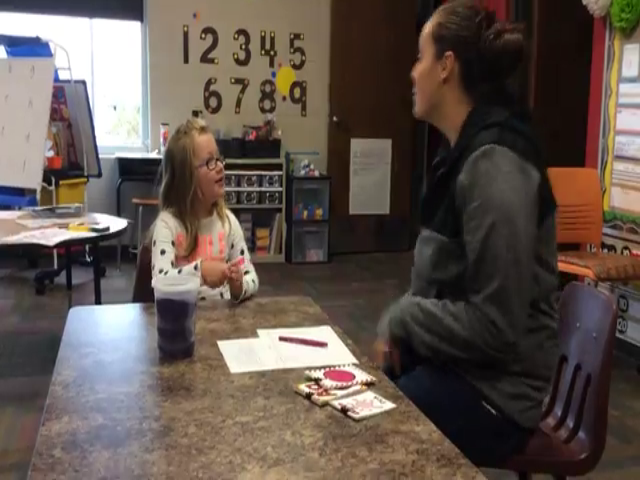


0: 480x640 2 persons, 1 cup, 3 chairs, 2 dining tables, 3 books, 28.2ms
Speed: 1.8ms preprocess, 28.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


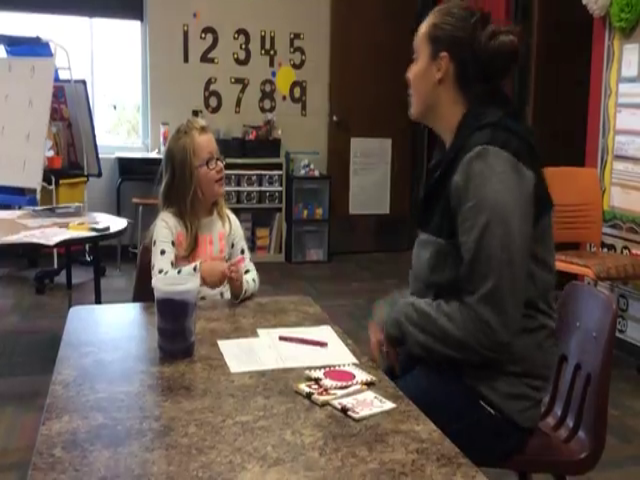


0: 480x640 2 persons, 1 cup, 3 chairs, 2 dining tables, 3 books, 28.2ms
Speed: 1.8ms preprocess, 28.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


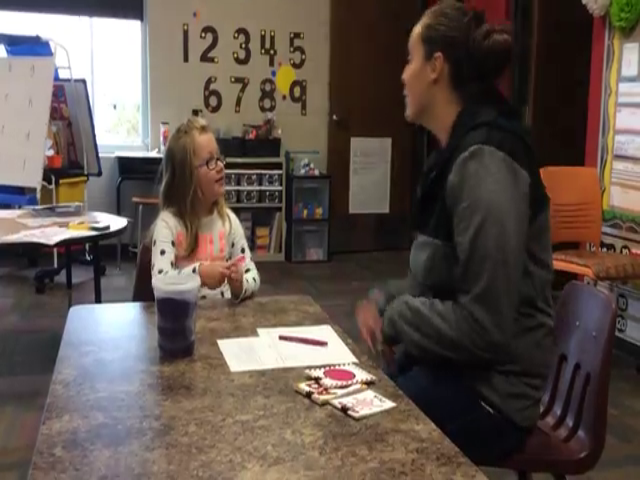


0: 480x640 2 persons, 1 cup, 4 chairs, 2 dining tables, 3 books, 28.2ms
Speed: 1.3ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


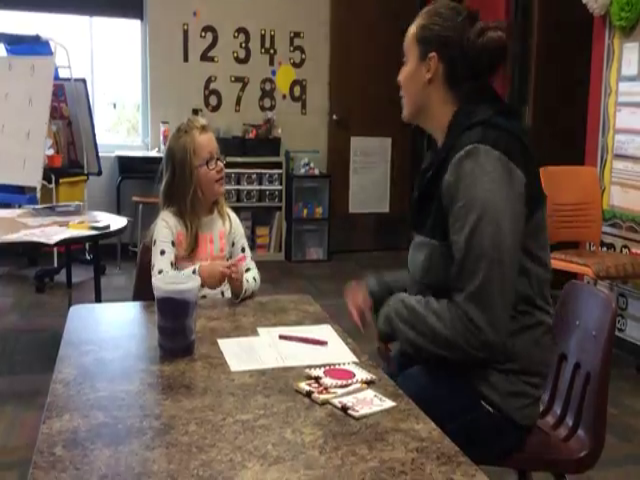


0: 480x640 2 persons, 1 cup, 3 chairs, 2 dining tables, 1 book, 28.2ms
Speed: 1.3ms preprocess, 28.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


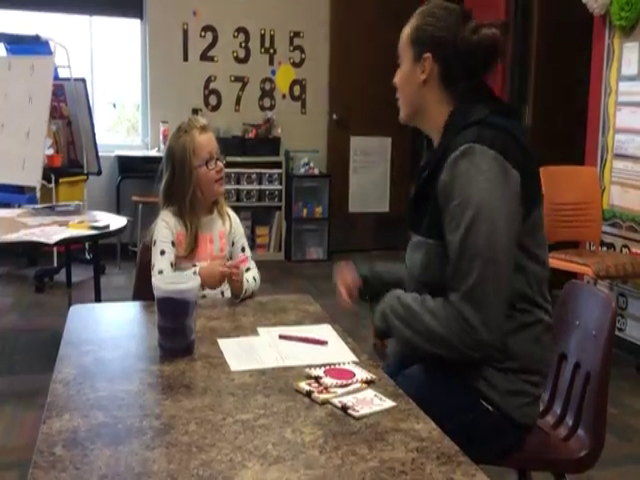


0: 480x640 2 persons, 1 cup, 3 chairs, 2 dining tables, 3 books, 28.2ms
Speed: 1.9ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


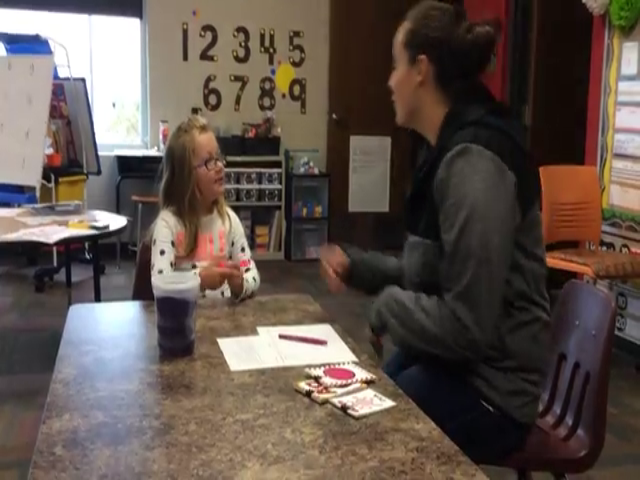


0: 480x640 2 persons, 1 cup, 3 chairs, 2 dining tables, 2 books, 28.2ms
Speed: 1.3ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


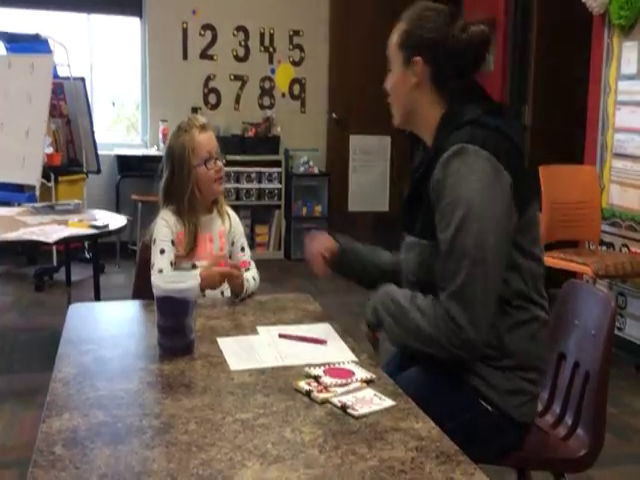

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from ultralytics.utils import torch_utils
from deep_sort_realtime.deepsort_tracker import DeepSort
#Import the cv2_imshow patch from google.colab.patches
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model (assuming 'yolov8m.pt' is in your Colab environment)
model = YOLO("yolov8m.pt")

def track_objects(outputs, img, img0):
  """
  Tracks objects using DeepSORT tracker.

  Args:
      outputs: YOLO model outputs.
      img: Original image frame.
      img0: Copied image frame for drawing.

  Returns:
      None. Modifies the img0 frame with tracked bounding boxes.
  """

  # Initialize DeepSORT tracker (assuming model_path is not required)
  tracker = DeepSort()
  bboxes = []
  ids = []
  confidences = []

  # Convert YOLO outputs to DeepSORT format
  for output in outputs:
    for detection in output:
      scores = detection[5:]
      # Check if scores is empty before calculating argmax
      if len(scores) > 0:
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and class_id in [0, 1]:  # Filter by class (child or therapist)
          x, y, w, h = detection[0:4] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
          bboxes.append([x, y, w, h])
          ids.append(class_id)
          confidences.append(confidence)

  if len(bboxes) > 0:
    # Update tracker with detections
    outputs = tracker.update(bboxes, confidences, ids)

    # Draw tracked bounding boxes
    if len(outputs) > 0:
      for j, (output, conf) in enumerate(zip(outputs, confidences)):
        x, y, w, h, id = output
        cv2.rectangle(img0, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
        cv2.putText(img0, f"ID: {id}", (int(x), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# (Optional) Mount Google Drive if needed (comment out if not using)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the test videos (modify paths if needed)
test_videos = []
for file in os.listdir('/content/sample_data/videos_data'):
  if file.endswith('.mp4'):
    test_videos.append(os.path.join('/content/sample_data/videos_data', file))

# Run the inference pipeline
for video_path in test_videos:
  cap = cv2.VideoCapture(video_path)
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    img = cv2.resize(frame, (640, 480))
    img0 = img.copy()
    outputs = model(img)
    track_objects(outputs, img, img0)
    #Use cv2_imshow instead of cv2.imshow
    cv2_imshow(img0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

Save the output videos


In [ ]:
import cv2

# Save the output videos
for video_path in test_videos:
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_path.replace('.mp4', '_output.mp4'), fourcc,